In [1]:
from cortexlib.utils.plotting import simclr_colours, vgg19_colours, gabor_filter_colours
from cortexlib.utils import file as futils
from cortexlib.utils.logging import Logger
import pandas as pd
import matplotlib.pyplot as plt

logger = Logger()

In [2]:
MOUSE_ID = futils.get_mouse_id()
logger.info(f"This notebook is running for mouse {MOUSE_ID}")

15:41:37 | INFO     | ℹ️ This notebook is running for mouse m01_d2


In [3]:
simclr_fev_results = futils.read_json_file_as_dataframe('../03_simclr_neural/prediction.json')
best_fev_per_simclr_layer = simclr_fev_results.loc[simclr_fev_results.groupby("layer")["mean_fev"].idxmax()]

best_fev_per_simclr_layer

,layer,n_pcs,test_r2,mean_fev
42,fc,300.0,0.024316,0.162557
3,layer1,50.0,0.034359,0.159821
9,layer2,NaN,0.039008,0.196576
18,layer3,NaN,0.046731,0.173795
29,layer4,20.0,0.025872,0.157266


In [4]:
vgg19_fev_results = futils.read_json_file_as_dataframe('../05_vgg19_neural/prediction.json')
best_fev_per_vgg19_layer = vgg19_fev_results.loc[vgg19_fev_results.groupby("layer")["mean_fev"].idxmax()]

best_fev_per_vgg19_layer

,layer,n_pcs,test_r2,mean_fev
0,conv2_2,NaN,0.021229,0.128841
5,conv3_4,NaN,0.017866,0.108915
10,conv4_4,NaN,0.018915,0.128420
15,conv5_4,NaN,0.012395,0.099506
20,fc2,NaN,0.009707,0.095504


In [5]:
gabor_fev_results = futils.read_json_file_as_dataframe('../01_gabor_neural/prediction.json')
best_fev_per_gabor_filter_bank = gabor_fev_results.loc[gabor_fev_results.groupby("filter")["mean_fev"].idxmax()]

best_fev_per_gabor_filter_bank

,filter,n_pcs,test_r2,mean_fev
14,gabor_large,2.0,-0.006064,0.023882
8,gabor_medium,2.0,-0.006085,0.023859
2,gabor_small,2.0,-0.006027,0.023992


In [6]:
# Add model identifiers
best_fev_per_simclr_layer['model'] = 'SimCLR'
best_fev_per_vgg19_layer['model'] = 'VGG19'
best_fev_per_gabor_filter_bank['model'] = 'Gabor'

# Rename layer/filter column to a common name
best_fev_per_simclr_layer = best_fev_per_simclr_layer.rename(columns={"layer": "representation"})
best_fev_per_vgg19_layer = best_fev_per_vgg19_layer.rename(columns={"layer": "representation"})
best_fev_per_gabor_filter_bank = best_fev_per_gabor_filter_bank.rename(columns={"filter": "representation"})

# Combine all into a single DataFrame
combined = pd.concat([
    best_fev_per_simclr_layer,
    best_fev_per_vgg19_layer,
    best_fev_per_gabor_filter_bank
])

combined

,representation,n_pcs,test_r2,mean_fev,model
42,fc,300.0,0.024316,0.162557,SimCLR
3,layer1,50.0,0.034359,0.159821,SimCLR
9,layer2,NaN,0.039008,0.196576,SimCLR
18,layer3,NaN,0.046731,0.173795,SimCLR
29,layer4,20.0,0.025872,0.157266,SimCLR
0,conv2_2,NaN,0.021229,0.128841,VGG19
5,conv3_4,NaN,0.017866,0.108915,VGG19
10,conv4_4,NaN,0.018915,0.128420,VGG19
15,conv5_4,NaN,0.012395,0.099506,VGG19
20,fc2,NaN,0.009707,0.095504,VGG19


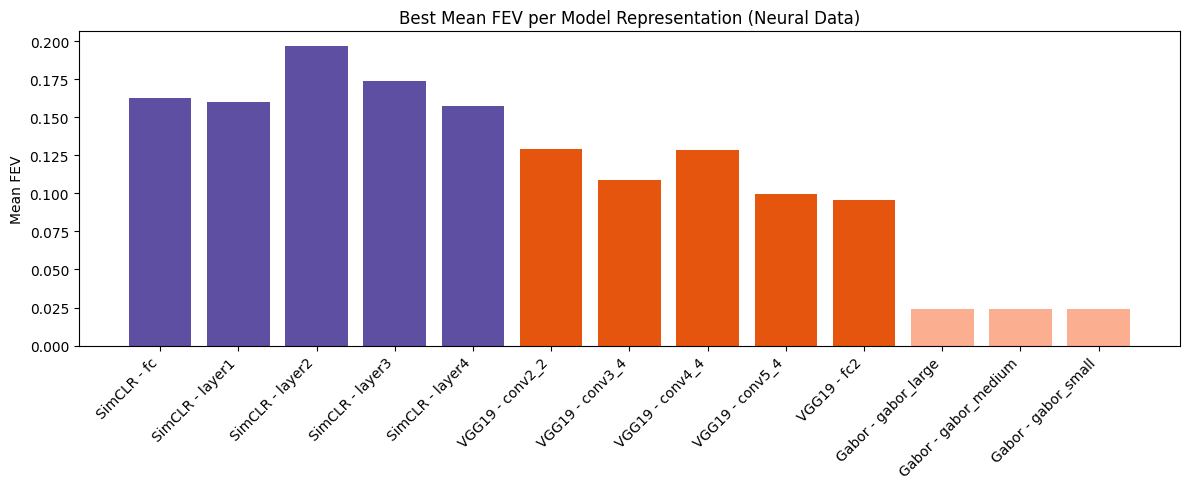

In [7]:
# Create a unique label for plotting
combined['label'] = combined['model'] + ' - ' + combined['representation']

colour = {
    'SimCLR': simclr_colours['layer3'],
    'VGG19': vgg19_colours['conv4_4'],
    'Gabor': gabor_filter_colours['gabor_medium']
}
colours = combined['model'].map(colour)

plt.figure(figsize=(12, 5))
plt.bar(combined['label'], combined['mean_fev'], color=colours)
plt.ylabel('Mean FEV')
plt.title('Best Mean FEV per Model Representation (Neural Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()